**Import necessary libraries**

In [23]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


**Load the dataset**

In [24]:
df = pd.read_csv("creditcard.csv")

**Exploratory Data Analysis(EDA)**

In [25]:
# Time column = Number of seconds elapsed between this transaction and the first transaction in the dataset
# AMount column = Amount of transaction
# class = 0=> Not Fraud , 1 =>Fraud
# V columns (column #1 to 29) => undisclosed (private) 

shape = df.shape
print("shape of data = ",shape)
Feature_Size = len(df.columns)
Class_Index = Feature_Size -1 
print("Feature_Size = ",Feature_Size)
print("Target Index = ",Class_Index)
df.head()

shape of data =  (73377, 31)
Feature_Size =  31
Target Index =  30


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [8]:
Num_of_Fraud = round(df['Class'].value_counts()[1]/len(df)*100,3)
Num_of_NonFraud = round(df['Class'].value_counts()[0]/len(df)*100,3)


print("Number of Fraud Values : ",df['Class'].value_counts()[1])
print("Number of Non Fraud Values : ",df['Class'].value_counts()[0])
print("Percentage of Fraud transactions : ", Num_of_Fraud)
print("Percentage of Normal(Non-Fraud) transactions : ",Num_of_NonFraud)

Number of Fraud Values :  2
Number of Non Fraud Values :  3970
Percentage of Fraud transactions :  0.05
Percentage of Normal(Non-Fraud) transactions :  99.924


Pie Chart:


Text(0, 0.5, '')

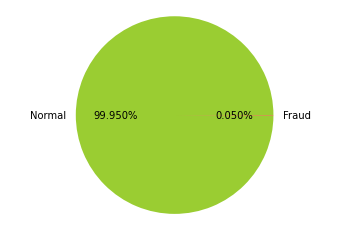

In [9]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud

print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.3f%%', labels=['Normal','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

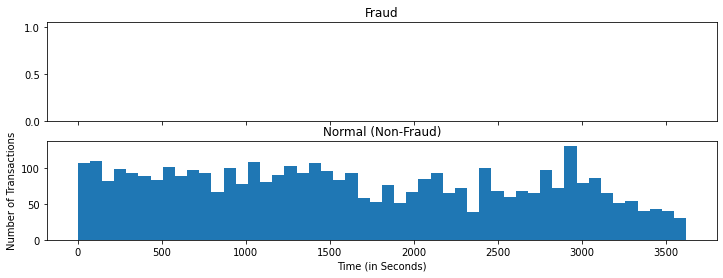

In [10]:
# now checking Time value in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

axis_1.hist(df.Time[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(df.Time[df.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()


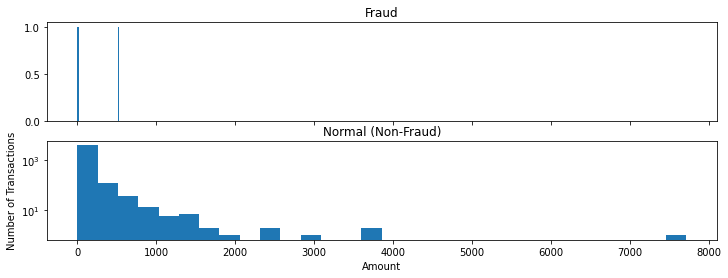

In [11]:
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(df.Amount[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(df.Amount[df.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64


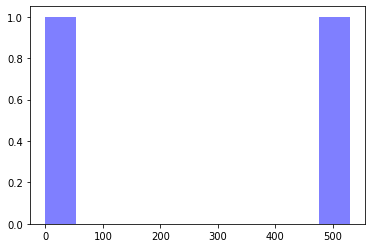

In [14]:
print(df.Amount[df.Class == 1 ].describe())
plt.hist(df.Amount[df.Class == 1 ], 10, facecolor='blue', alpha=0.5)
plt.show()

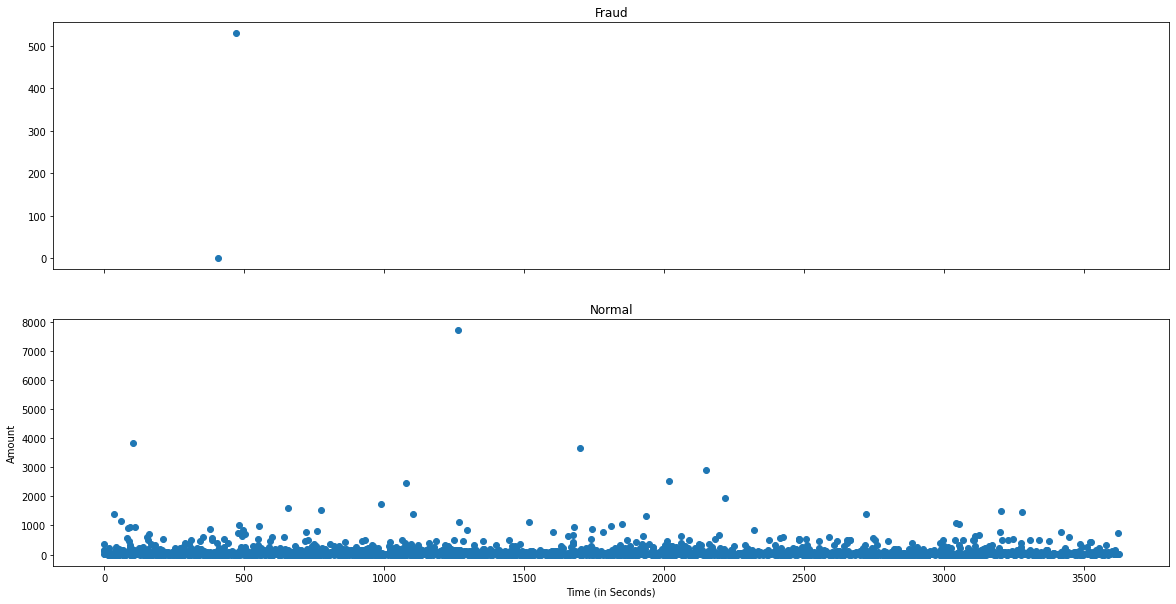

In [13]:
# checking Time vs Amount feature. scatter plot

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

axis_1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
axis_1.set_title('Fraud')

axis_2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
axis_2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

**Getting all the V features**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

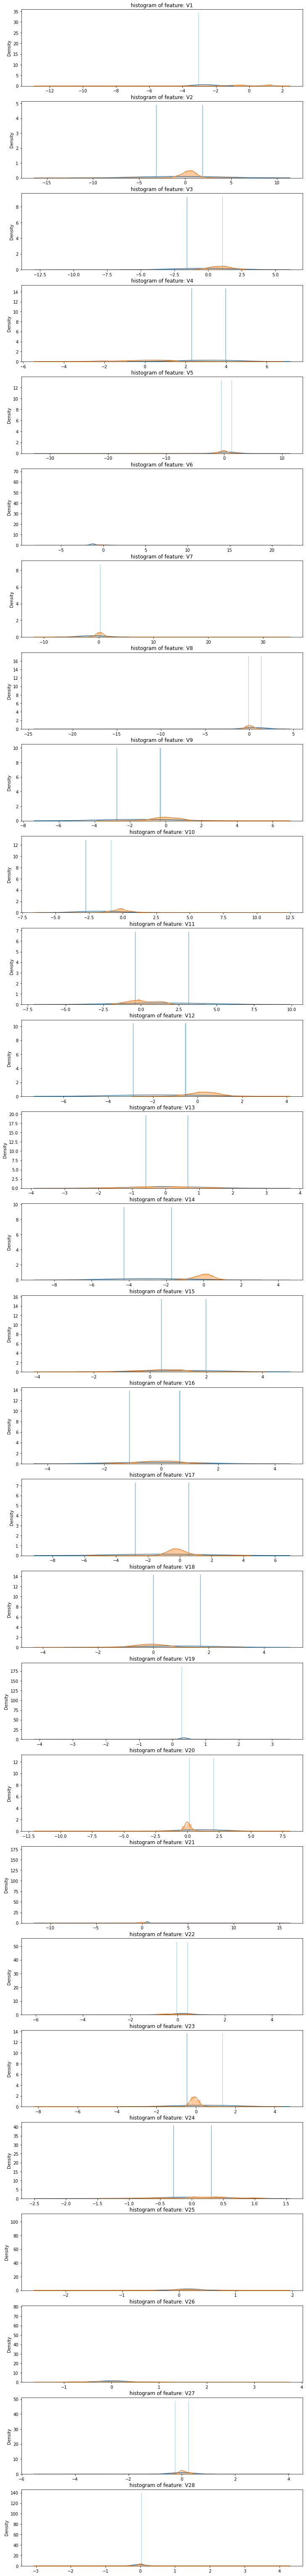

In [15]:
# getting all the V features
v_features = df.iloc[:,1:29].columns

#plotting histograms of all v_features (of fraud +normal) to check which of them are useful
# the more diff b/w fraud and normal = more important for learning

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,label="Fraud")
    sns.distplot(df[cn][df.Class == 0], bins=50,label="Normal")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+cn)
plt.show()

**Correlation**

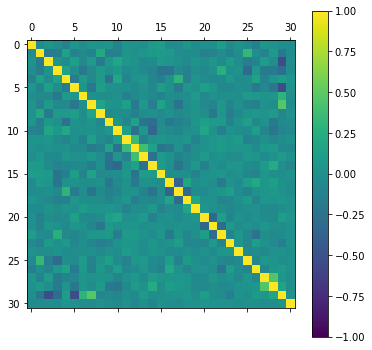

In [16]:
#Finding Corelation

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()